# nerual network （神经网络）

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import matplotlib
import scipy.optimize as opt
from sklearn.metrics import classification_report # 这个包是评价报告

In [2]:
def load_data(path, transpose=True): # 数据处理相关
    data = sio.loadmat(path)
    y = data.get('y') # (5000,1)
    y = y.reshape(y.shape[0]) # make it to column vector (列向量)
    
    X = data.get('X') # (5000, 400)
    
    if transpose:
         X = np.array([im.reshape((20,20)).T for im in X])
         
         X = np.array([im.reshape(400) for im in X])
         
    return X, y

In [3]:
X, y = load_data('ex3data1.mat')

print(X)
print(y)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[10 10 10 ...  9  9  9]


In [4]:
def plot_an_image(image): # 绘图函数
    
    fig, ax = plt.subplots(figsize=(1, 1))
    
    ax.matshow(image.reshape((20, 20)), cmap=matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))

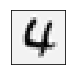

this should be 4


In [5]:
pick_one = np.random.randint(0, 5000)
plot_an_image(X[pick_one, :])
plt.show()
print('this should be {}'.format(y[pick_one]))

In [6]:
def plot_100_image(X): # 绘图函数，画 100 张图片
    
    size = int(np.sqrt(X.shape[1]))
    
    sample_idx = np.random.choice(np.arange(X.shape[0]), 100)
    sample_images = X[sample_idx, :]
    
    fig, ax_array = plt.subplots(nrows=10, ncols=10, sharey=True, sharex=True, figsize=(8, 8))
    
    for r in range(10):
        for c in range(10):
            ax_array[r, c].matshow(sample_images[10 * r + c].reshape((size, size)),
                                   cmap=matplotlib.cm.binary)
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))

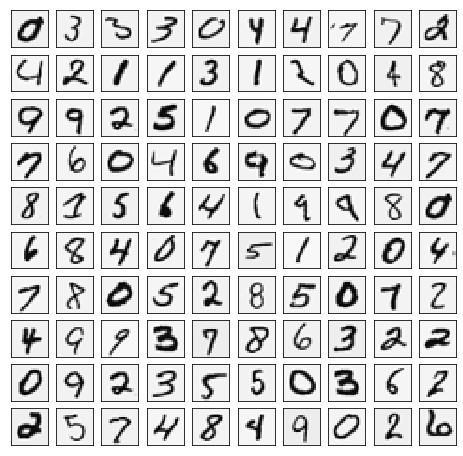

In [7]:
plot_100_image(X)
plt.show()

# 准备数据

In [8]:
raw_X, raw_y = load_data('ex3data1.mat')
print(raw_X.shape)
print(raw_y.shape)

(5000, 400)
(5000,)


In [9]:
# add 1 for X_0
X = np.insert(raw_X, 0, values=np.ones(raw_X.shape[0]), axis=1) # 将全1的列向量插入了 X 矩阵的第一列
print(X)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [10]:
# y have 10 categories here. 1..10, they represent digit 0 as category 10 because matlab index start at 1
# I'll ditit 0, index 0 again
y_matrix = []

for k in range(1, 11):
    y_matrix.append((raw_y == k).astype(int)) # 见 “向量化标签.png”
    
# 最后一列k=10，都是0，把最后一列放到第一列    
y_matrix = [y_matrix[-1]] + y_matrix[:-1]
y = np.array(y_matrix)

y

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1]])

# train 1 model

In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost(theta, X, y):
    return np.mean(-y * np.log(sigmoid(X @ theta)) - (1 - y) * np.log(1 - sigmoid(X @ theta)))

def gradient(theta, X, y):
    return (1 / len(X)) * X.T @ (sigmoid(X @ theta) - y)

def regularized_cost(theta, X, y, learning_rate=1):
    theta_no_zero = theta[1:]
    regularized_term = (learning_rate / (2 * len(X))) * np.power(theta_no_zero, 2).sum()
    return cost(theta, X, y) + regularized_term

def regularized_gradient(theta, X, y, learning_rate=1):
    theta_no_zero = theta[1:]
    regularized_theta = (learning_rate / len(X)) * theta_no_zero
    regularized_term = np.concatenate([np.array([0]), regularized_theta])
    return gradient(theta, X, y) + regularized_term

In [12]:
def logistic_regression(X, y, learning_rate=1):
    """generalized logistic regression
    args:
        X: feature matrix, (m, n+1) # with incercept x0=1
        y: target vector, (m, )
        learning_rate : lambda constant for regularization

    return: trained parameters
    """
    # init theta
    theta = np.zeros(X.shape[1])

    # train it
    res = opt.minimize(fun=regularized_cost,
                       x0=theta,
                       args=(X, y, learning_rate),
                       method='TNC',
                       jac=regularized_gradient,
                       options={'disp': True})
    # get trained parameters
    final_theta = res.x

    return final_theta

In [13]:
def predict(X, theta):
    prob = sigmoid(X @ theta)
    return (prob >= 0.5).astype(int)

In [14]:
result_theta = logistic_regression(X, y[0])
y_pred = predict(X, result_theta)
print('Accuracy={}'.format(np.mean(y[0] == y_pred)))

Accuracy=0.9974


# 神经网络模型图示
<img style="float: left;" src="../img/nn_model.png">

In [15]:
def load_weight(path):
    data = sio.loadmat(path)
    return data['Theta1'], data['Theta2']

theta1, theta2 = load_weight('ex3weights.mat')
theta1.shape, theta2.shape

((25, 401), (10, 26))

In [28]:
X, y = load_data('ex3data1.mat',transpose=False)

print(X.shape)

X = np.insert(X, 0, values=np.ones(X.shape[0]), axis=1)  # intercept X_0

X.shape, y

(5000, 400)


((5000, 401), array([10, 10, 10, ...,  9,  9,  9], dtype=uint8))

# feed forward prediction（前馈预测）

In [26]:
a1 = X

z2 = a1 @ theta1.T # (5000, 401) @ (401, 25) = (5000, 25)
print('z2.shape = {}'.format(z2.shape))

z2 = np.insert(z2, 0, values=np.ones(z2.shape[0]), axis=1)

a2 = sigmoid(z2)
print('a2.shape = {}'.format(a2.shape))

z3 = a2 @ theta2.T # (5000, 26) @ (26, 10) = (5000, 10)
print('z3.shape = {}'.format(z3.shape))

a3 = sigmoid(z3)
a3

z2.shape = (5000, 25)
a2.shape = (5000, 26)
z3.shape = (5000, 10)


array([[1.38245045e-04, 2.05540079e-03, 3.04012453e-03, ...,
        4.91017499e-04, 7.74325818e-03, 9.96229459e-01],
       [5.87756717e-04, 2.85026516e-03, 4.14687943e-03, ...,
        2.92311247e-03, 2.35616705e-03, 9.96196668e-01],
       [1.08683616e-04, 3.82659802e-03, 3.05855129e-02, ...,
        7.51453949e-02, 6.57039547e-03, 9.35862781e-01],
       ...,
       [6.27824726e-02, 4.50406476e-03, 3.54510925e-02, ...,
        2.63669734e-03, 6.89448164e-01, 2.74369466e-05],
       [1.01908736e-03, 7.34360211e-04, 3.78558700e-04, ...,
        1.45616578e-02, 9.75989758e-01, 2.33374461e-04],
       [5.90807037e-05, 5.41717668e-04, 2.58968308e-05, ...,
        7.00508308e-03, 7.32814653e-01, 9.16696059e-02]])

In [27]:
y_pred = np.argmax(a3, axis=1) + 1  # numpy is 0 base index, +1 for matlab convention，返回每一行最大的值的索引,axis=1 => 按行找
y_pred

array([10, 10, 10, ...,  9,  9,  9], dtype=int64)

In [24]:
print(classification_report(y, y_pred))    

              precision    recall  f1-score   support

           1       0.97      0.98      0.97       500
           2       0.98      0.97      0.97       500
           3       0.98      0.96      0.97       500
           4       0.97      0.97      0.97       500
           5       0.98      0.98      0.98       500
           6       0.97      0.99      0.98       500
           7       0.98      0.97      0.97       500
           8       0.98      0.98      0.98       500
           9       0.97      0.96      0.96       500
          10       0.98      0.99      0.99       500

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000

